In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'https://raw.githubusercontent.com/dan1dr/microdosing/main/data/wide.csv'
data = pd.read_csv('./wide.csv', sep=',', index_col=0)
pd.options.display.max_columns = None

## Benefits and Drawbacks

Let's go with the most important data about microdosing, that is the reported benefits and drawbacks per user. Respondents were asked to fill in 3 benefits or "pros", and 3 drawbacks or "cons". Each characteristic is ranked from 0 (Not at all important) to 100 (Extremely important).

In [3]:
data.head()

ResponseId         StartDate           EndDate      RecordedDate  \
0  R_0HSeYpblz5LCLpD  19/09/2017 18:27  19/09/2017 18:51  19/09/2017 18:51   
1  R_0MpphsGkrwSMhuF  10/10/2017 21:06  10/10/2017 21:10  24/10/2017 21:10   
2  R_0N8EpmmQ5b79cxr  18/10/2017 20:29  18/10/2017 23:51  18/10/2017 23:51   
3  R_0Nj0uZDZlPP0IRX  18/09/2017 11:40  18/09/2017 11:58  18/09/2017 11:58   
4  R_0OZWDFj2krlpms9  22/09/2017 18:03  23/09/2017 06:47  07/10/2017 06:47   

   Angry  Distressed  Afraid  Frustrated  Nervous  Alarmed  Tense  Annoyed  \
0      0           1       1           1        1        1      1        1   
1      0           0       0           1        0        0      0        0   
2      0           0       0           0        0        0      0        0   
3      0           0       0           0        0        0      0        0   
4      0           1       0           0        1        0      0        0   

   Astonished  Excited  Alert  Delighted  Amused  Glad  Happy  Pleased  Sad  \
0           0        0      1          0       1     0      0        0    1   
1           0        0      0          0       0     0      0        0    1   
2           0        0      0          0       0     0      1        0    0   
3           0        0      0          0       0     0      0        0    0   
4           0        1      1          0       1     0      1        1    0   

   Miserable  Depressed  Droopy  Gloomy  Fatigued  Bored  Tired  Serene  \
0          1          0       1       1         0      0      1       0   
1          0          0       0       0         1      1      1       0   
2          0          0       1       0         1      0      1       0   
3          0          0       1       0         1      0      0       0   
4          0          0       1       0         0      0      1       1   

   Content  Calm  At ease  Satisfied  Relaxed  Sleepy  Quiet  Current  Reddit  \
0        0     0        0          0        0       1      0        1       5   
1        1     1        0          0        1       0      1        1       1   
2        1     0        0          0        1       1      0        2       2   
3        0     0        0          0        0       0      0        1       1   
4        1     0        1          1        1       1      0        2       5   

   Country  Age  Gender  Orientation  Ethnicity Ethnicity_11_TEXT  Religion  \
0      187   21    -1.0         -1.0          1               -99         1   
1      187   29    -1.0         -1.0          6               -99         1   
2      187   20    -1.0         -1.0         13               -99         1   
3      128   31    -1.0         -1.0          1               -99         1   
4       -1   27    -1.0         -1.0          1               -99        14   

  Religion_12_TEXT  Religiosity  Spirituality  Education  SES  AgeMD  \
0              -99            2            20        6.0  1.0     20   
1              -99           14            19        7.0  2.0     28   
2              -99            0             5        3.0  2.0     19   
3              -99            0            28        6.0  1.0     32   
4              -99            2            68        6.0  2.0     26   

   Substance_1  Substance_2  Substance_8  Dose_1  Dose_4  Dose_2  Dose_3  \
0            1          -99          -99     -99       1     -99     -99   
1            1            1          -99     -99       1     -99     -99   
2            1          -99          -99       1       1     -99     -99   
3            1          -99          -99     -99       1     -99     -99   
4          -99            1          -99     -99     -99       1     -99   

   Dose_7  Dose_8  Spacing  DoseNumber  Money Money_1_TEXT Money_2_TEXT  \
0     -99     -99        3        25.0      1            5          -99   
1     -99     -99        1        26.0      1           20          -99   
2     -99     -99        5        25.0      1           10          -

**Benefits**

In [33]:
data['ProCode1'].value_counts()

Improved Mood                    46
Improved Focus                   32
Improved Energy                  28
Creativity                       27
Reduced Depression               19
Improved Motivation              10
Clarity of Thought               10
Mindful Presence                 10
Reduced Anxiety                   9
Sociability                       7
Introspection                     6
Cognitive Enhancement             5
Calm                              5
Improved Productivity             5
Emotional Intelligence            5
Wakefulness                       5
Heightened Awareness              4
Perspective Shifting              4
Confidence                        4
Appreciation                      3
Reduced Stress                    3
Alertness                         3
Improved Senses                   3
Spirituality                      3
Openness                          3
Engagement                        3
Sleep                             2
Lack of Side-Effects        

Text(0.5, 1.0, 'First Benefit')

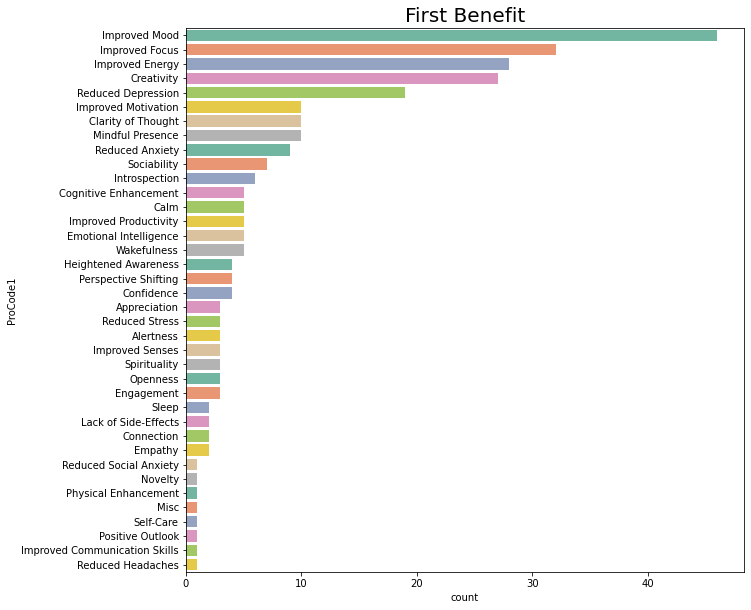

In [106]:
plt.figure(figsize=(10,10))

order_ranked = data['ProCode1'].value_counts().index
sns.countplot(data=data, y=data['ProCode1'], order=order_ranked, palette='Set2')

plt.title('First Benefit',fontsize=20)

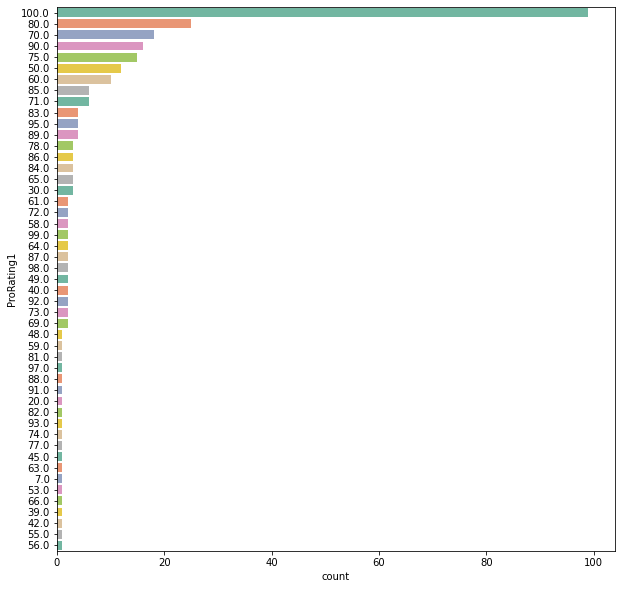

In [44]:
plt.figure(figsize=(10,10))
order_ranked = data['ProRating1'].value_counts().index
sns.countplot(data=data, y='ProRating1', order=order_ranked, palette='Set2')

In [103]:
def pro_mean(df, code):
    
    ''' Return the mean per each procode in the same order 
    as its popularity'''

    scores = []
    if code == 'ProCode1':
        rating = 'ProRating1'
    elif code == 'ProCode2':
        rating = 'ProRating2'
    elif code == 'ProCode3':
        rating = 'ProRating3'
    index_list = df[code].value_counts().index
    for i in index_list:
        score = df[df[code] == i][rating].mean()
        scores.append(score)
    return scores

In [104]:
scores1 = pro_mean(data, 'ProCode1')
scores2 = pro_mean(data, 'ProCode2')
scores3 = pro_mean(data, 'ProCode3')

In [131]:
df1 = pd.DataFrame({'Benefit': data['ProCode1'].value_counts().index, 'Average Score 1': scores1})
df2 = pd.DataFrame({'Benefit': data['ProCode2'].value_counts().index, 'Average Score 2': scores2})
df3 = pd.DataFrame({'Benefit': data['ProCode3'].value_counts().index, 'Average Score 3': scores3})
wide

Benefit  Average Score 1  \
0                   Improved Mood        86.369565   
1                  Improved Focus        78.593750   
2                 Improved Energy        75.035714   
3                      Creativity        73.888889   
4              Reduced Depression        95.421053   
5             Improved Motivation        88.900000   
6              Clarity of Thought        79.800000   
7                Mindful Presence        88.200000   
8                 Reduced Anxiety        90.555556   
9                     Sociability        82.714286   
10                  Introspection        84.166667   
11          Cognitive Enhancement        96.400000   
12                           Calm        66.000000   
13          Improved Productivity        75.600000   
14         Emotional Intelligence        93.200000   
15                    Wakefulness        78.200000   
16           Heightened Awareness        74.250000   
17           Perspective Shifting        77.500000   
18                     Confidence        86.250000   
19                   Appreciation        84.000000   
20                 Reduced Stress        64.333333   
21                      Alertness        63.333333   
22                Improved Senses        63.333333   
23                   Spirituality        96.666667   
24                       Openness        85.333333   
25                     Engagement        86.666667   
26                          Sleep        94.500000   
27           Lack of Side-Effects        92.500000   
28                     Connection        84.000000   
29                        Empathy       100.000000   
30         Reduced Social Anxiety       100.000000   
31                        Novelty        71.000000   
32           Physical Enhancement        91.000000   
33                           Misc        50.000000   
34                      Self-Care       100.000000   
35               Positive Outlook        89.000000   
36  Improved Communication Skills        80.000000   
37              Reduced Headaches       100.000000   

                          Benefit  Average Score 2  \
0                  Improved Focus        84.933333   
1                   Improved Mood        80.600000   
2                 Improved Energy        70.047619   
3                      Creativity        74.529412   
4                         Empathy        69.384615   
5                 Reduced Anxiety        91.416667   
6              Reduced Depression        90.250000   
7           Cognitive Enhancement        83.333333   
8             Improved Motivation        81.200000   
9              Clarity of Thought        81.888889   
10           Perspective Shifting        87.777778   
11                    Sociability        72.750000   
12                   Appreciation        84.285714   
13                   Spirituality        73.714286   
14                           Calm        81.000000   
15                     Confidence        94.666667   
16          Improved Productivity        71.666667   
17                      Alertness        76.500000   
18                     Engagement        73.400000   
19         Emotional Intelligence        72.200000   
20           Heightened Awareness        74.000000   
21                    Wakefulness        88.750000   
22                        Novelty        91.666667   
23               Positive Outlook        80.000000   
24               Mindful Presence        78.333333   
25                       Openness        91.666667   
26                     Connection        81.333333   
27                      Self-Care        75.666667   
28                         Memory        92.500000   
29                           Misc       100.000000   
30                   Dose Control        80.000000   
31         Reduced Social Anxiety        87.500000   
32                 Reduced Stress        86.000000   
33                          Sleep        60.000000   
34                Sense of Ag

In [137]:
#wide = pd.concat([df1,df2,df3], axis=1, join='inner')
benefits = df1.merge(df2, on= 'Benefit')
benefits = benefits.merge(df3, on = 'Benefit')
benefits['Average Score'] = (benefits['Average Score 1']+benefits['Average Score 1']+benefits['Average Score 1'])/3
benefits

Benefit  Average Score 1  Average Score 2  \
0                   Improved Mood        86.369565        80.600000   
1                  Improved Focus        78.593750        84.933333   
2                 Improved Energy        75.035714        70.047619   
3                      Creativity        73.888889        74.529412   
4              Reduced Depression        95.421053        90.250000   
5             Improved Motivation        88.900000        81.200000   
6              Clarity of Thought        79.800000        81.888889   
7                Mindful Presence        88.200000        78.333333   
8                 Reduced Anxiety        90.555556        91.416667   
9                     Sociability        82.714286        72.750000   
10                  Introspection        84.166667       100.000000   
11          Cognitive Enhancement        96.400000        83.333333   
12                           Calm        66.000000        81.000000   
13          Improved Productivity        75.600000        71.666667   
14         Emotional Intelligence        93.200000        72.200000   
15           Heightened Awareness        74.250000        74.000000   
16           Perspective Shifting        77.500000        87.777778   
17                     Confidence        86.250000        94.666667   
18                   Appreciation        84.000000        84.285714   
19                 Reduced Stress        64.333333        86.000000   
20                      Alertness        63.333333        76.500000   
21                Improved Senses        63.333333        29.000000   
22                   Spirituality        96.666667        73.714286   
23                       Openness        85.333333        91.666667   
24                     Engagement        86.666667        73.400000   
25                          Sleep        94.500000        60.000000   
26                     Connection        84.000000        81.333333   
27                        Empathy       100.000000        69.384615   
28         Reduced Social Anxiety       100.000000        87.500000   
29                        Novelty        71.000000        91.666667   
30           Physical Enhancement        91.000000        83.000000   
31                           Misc        50.000000       100.000000   
32                      Self-Care       100.000000        75.666667   
33               Positive Outlook        89.000000        80.000000   
34  Improved Communication Skills        80.000000        87.000000   

    Average Score 3  Average Score  
0         74.075000      86.369565  
1         66.750000      78.593750  
2         63.764706      75.035714  
3         77.343750      73.888889  
4         81.833333      95.421053  
5         70.600000      88.900000  
6         81.250000      79.800000  
7         36.000000      88.200000  
8         78.857143      90.555556  
9         78.307692      82.714286  
10        82.800000      84.166667  
11        85.000000      96.400000  
12        79.111111      66.000000  
13        62.857143      75.600000  
14        75.750000      93.200000  
15        81.333333      74.250000  
16        56.666667      77.500000  
17        90.000000      86.250000  
18        55.000000      84.000000  
19       100.000000      64.333333  
20        68.000000      63.333333  
21        69.750000      63.333333  
22        75.000000      96.666667  
23        75.166667      85.333333  
24        65.000000      86.666667  
25        69.333333      94.500000  
26        79.000000      84.000000  
27        85.000000     100.000000  
28        90.000000     100.000000  
29        79.750000      71.000000  
30        66.250000      91.000000  
31        44.000000      50.000000  
32        71.750000     100.000000  
33        64.000000      89.000000  
34       100.000000      80.000000

Text(0.5, 1.0, 'Average Score with the most reported Benefits')

<Figure size 720x720 with 0 Axes>

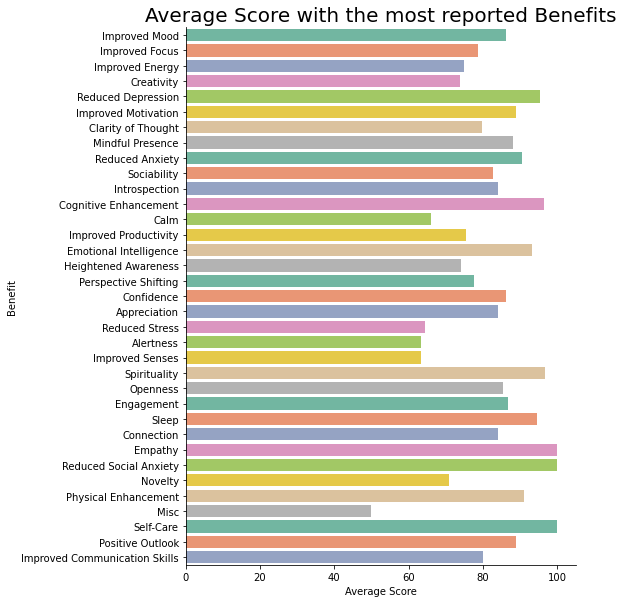

In [187]:
plt.figure(figsize=(10,10))
g = sns.catplot(data=benefits, kind="bar", y="Benefit", x="Average Score",
                palette="Set2", height=8)
plt.title('Average Score with the most reported Benefits',fontsize=20)

In [198]:
!pip install wordcloud

In [199]:
from wordcloud import WordCloud, STOPWORDS

In [196]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

In [284]:
pros = data['ProCode1'].values
pros = pros[~pd.isnull(pros)]
pros = pros.tolist()
str1 = ''.join(pros)
#listToString(x)

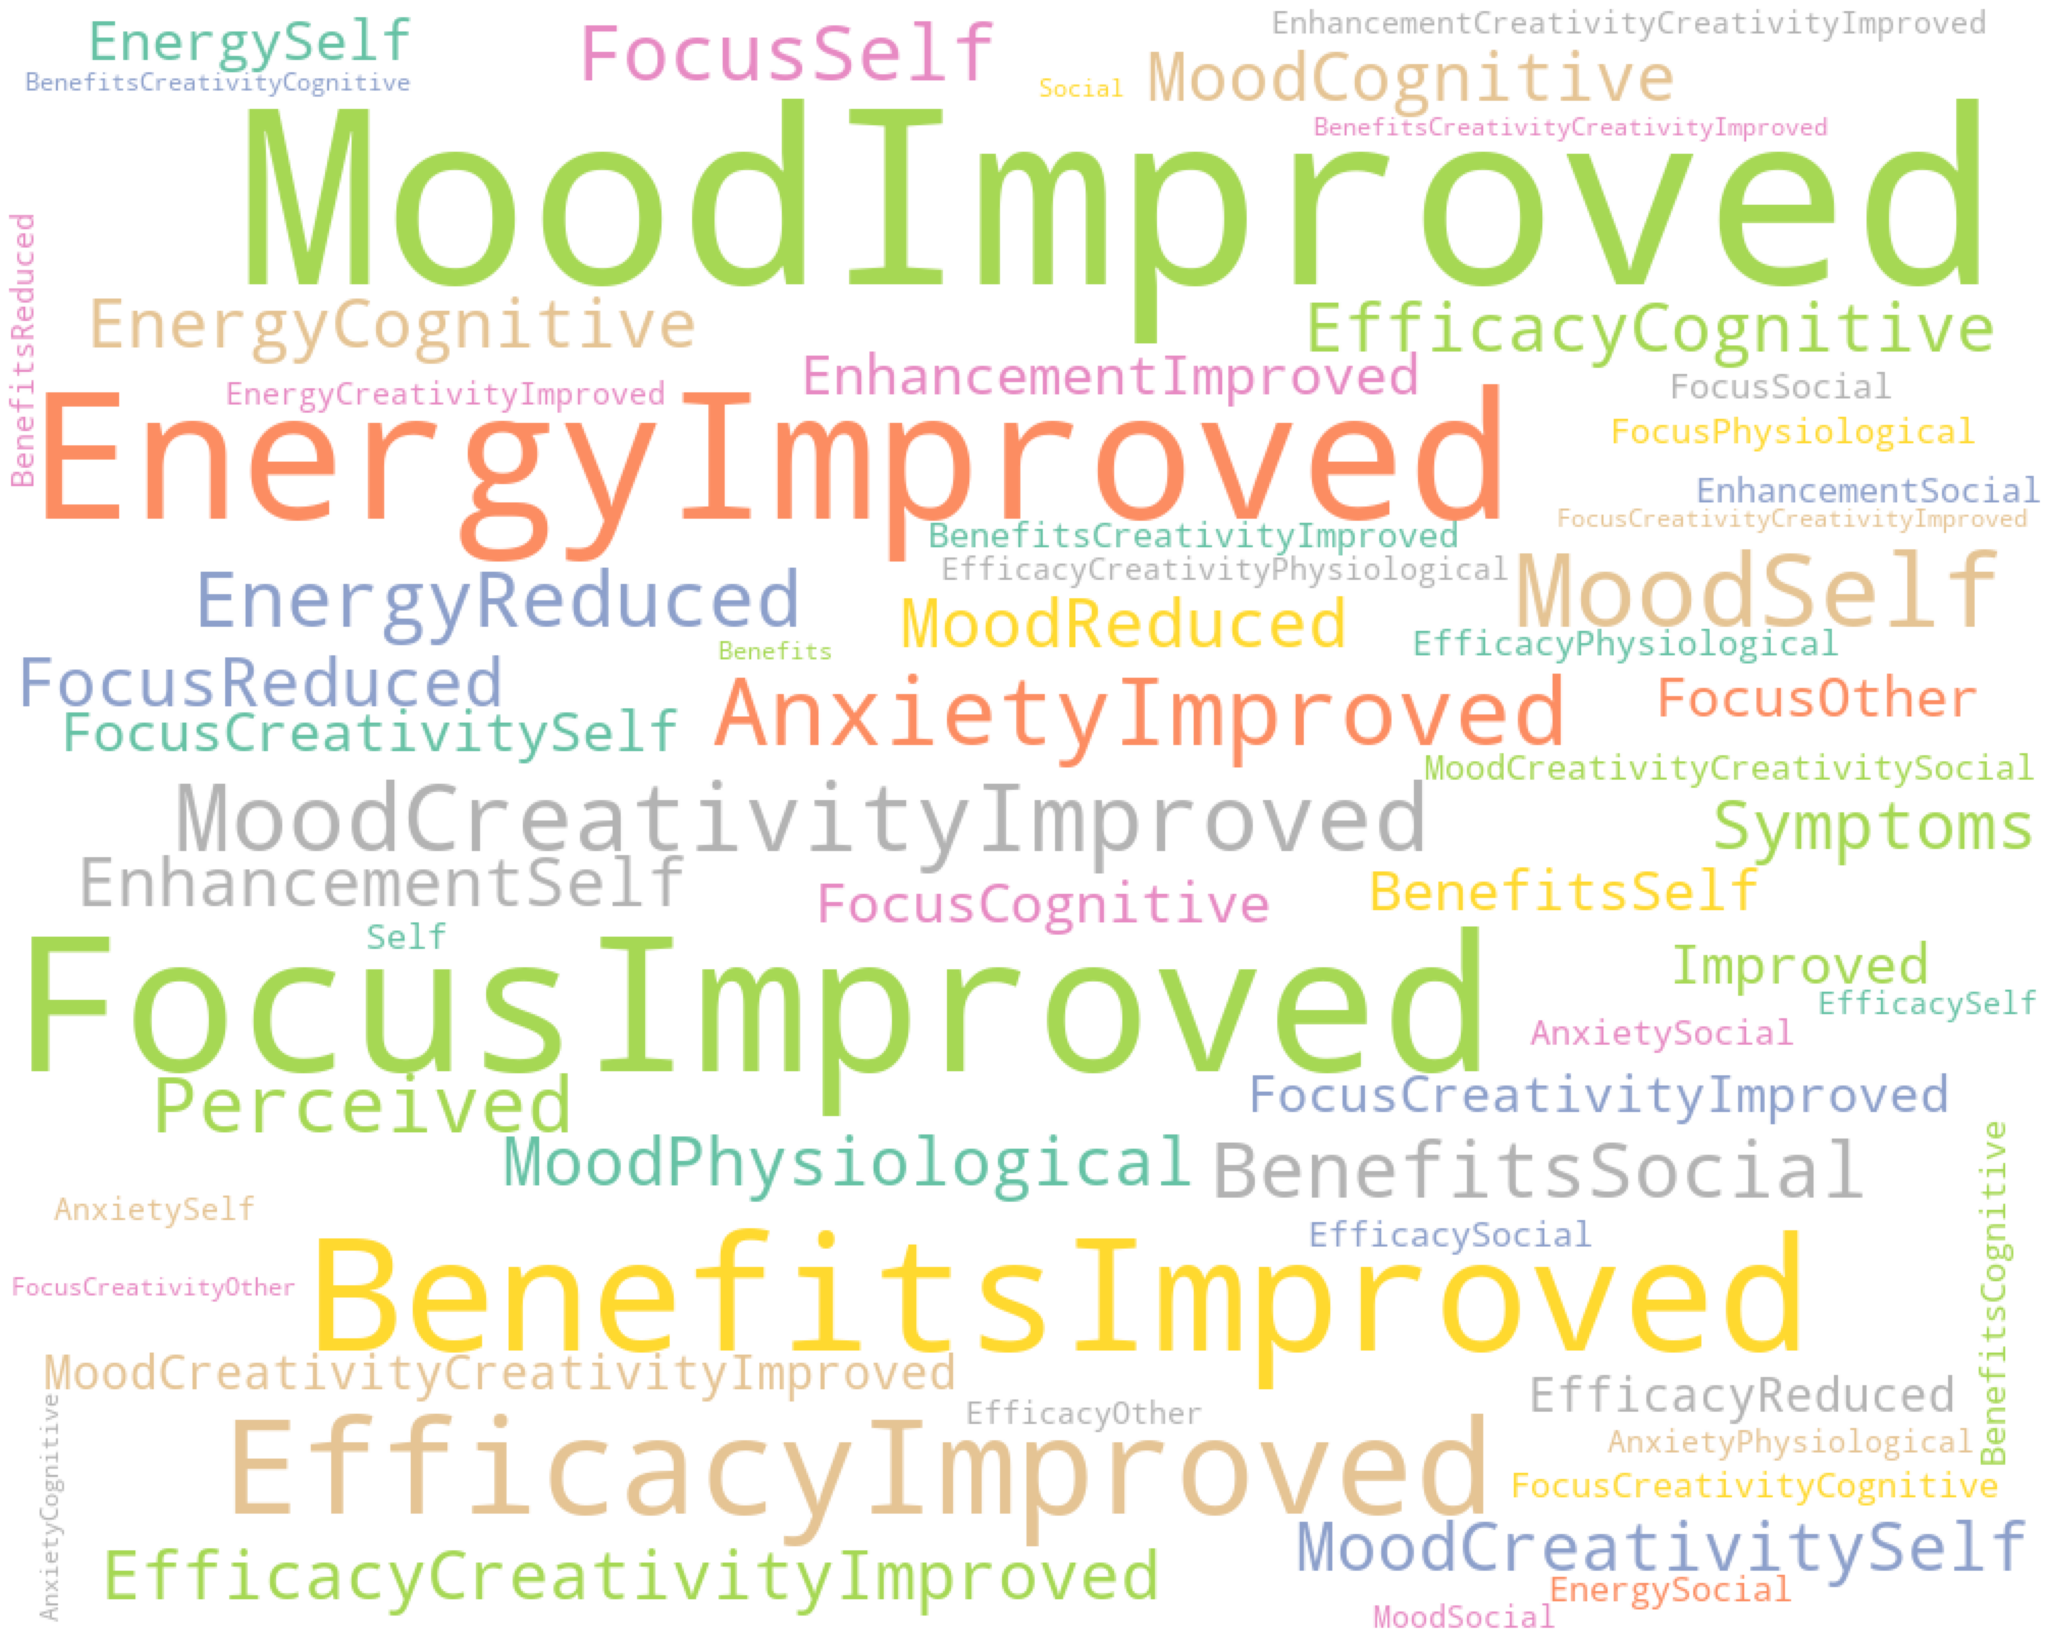

In [288]:
wordcloud = WordCloud(width = 1000, height = 800,
                      background_color='white', colormap='Set2',
                      collocations=False, stopwords = STOPWORDS).generate(str1)
plot_cloud(wordcloud)

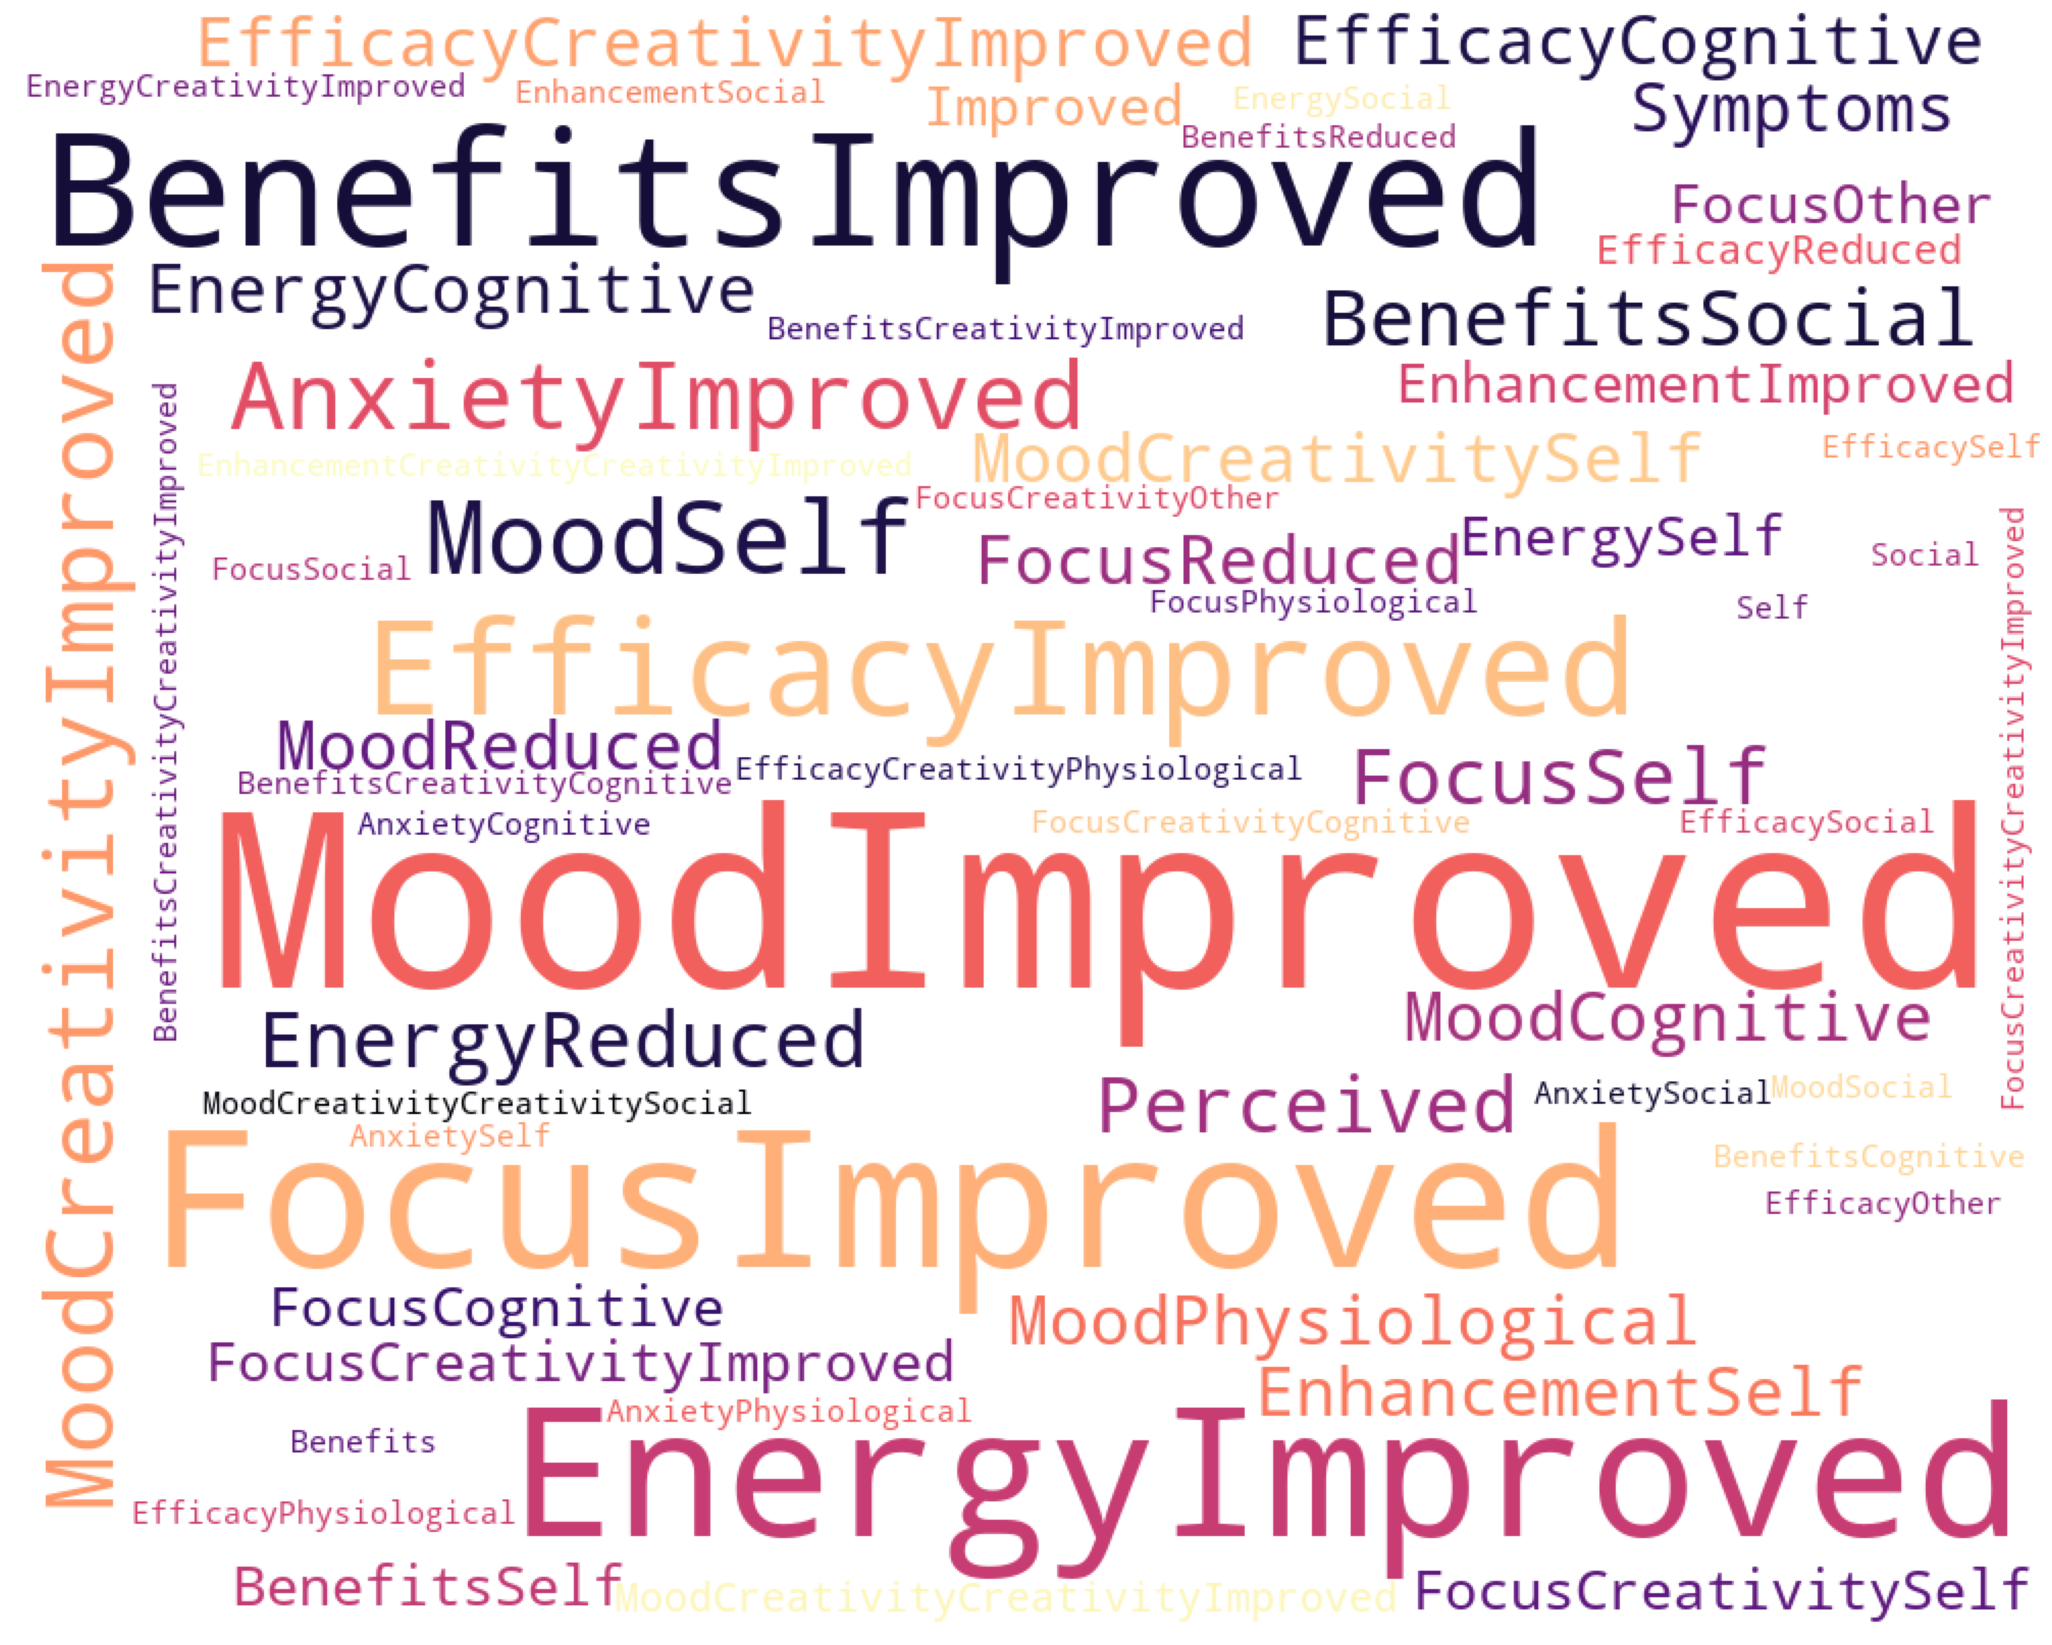

In [297]:
pros = data['ProCategory1'].values
pros = pros[~pd.isnull(pros)]
pros = pros.tolist()
str1 = ''.join(pros)
#listToString(x)

wordcloud = WordCloud(width = 1000, height = 800,
                      background_color='white', colormap='magma',
                      collocations=False, stopwords = STOPWORDS).generate(str1)
plot_cloud(wordcloud)

**Drawbacks**

In [188]:
data['ConCode1'].value_counts()

Illegality                      29
Anxiety                         24
Poor Focus                      21
Dose Accuracy                   19
Body Discomfort                 15
Restlessness                    13
Stigma                          12
Sleep Disturbances              11
GI Issues                       11
Unknown Risk-Effect Profile      8
Tolerance                        8
Unusualness                      6
Psychological Dependence         6
Social Anxiety                   5
Comedown                         5
Decreased Appetite               5
Fatigue                          4
Memory                           4
Emotional Depth                  4
Misc                             4
Emotional Instability            4
Financial Cost                   3
Irritability                     3
Substance Availability           3
Preparation                      3
Headache                         3
Duration Concerns                2
Racing Thoughts                  2
None                

Text(0.5, 1.0, 'First Drawback')

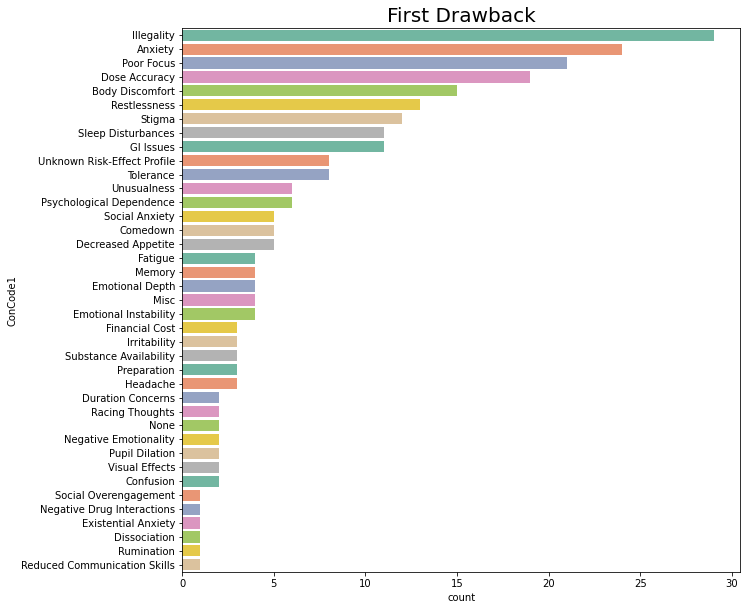

In [189]:
plt.figure(figsize=(10,10))

order_ranked = data['ConCode1'].value_counts().index
sns.countplot(data=data, y=data['ConCode1'], order=order_ranked, palette='Set2')

plt.title('First Drawback',fontsize=20)

In [190]:
def con_mean(df, code):
    
    ''' Return the mean per each concode in the same order 
    as its popularity'''

    scores = []
    if code == 'ConCode1':
        rating = 'ConRating1'
    elif code == 'ConCode2':
        rating = 'ConRating2'
    elif code == 'ConCode3':
        rating = 'ConRating3'
    index_list = df[code].value_counts().index
    for i in index_list:
        score = df[df[code] == i][rating].mean()
        scores.append(score)
    return scores

In [191]:
scores1 = con_mean(data, 'ConCode1')
scores2 = con_mean(data, 'ConCode2')
scores3 = con_mean(data, 'ConCode3')

df1 = pd.DataFrame({'Drawback': data['ConCode1'].value_counts().index, 'Average Score 1': scores1})
df2 = pd.DataFrame({'Drawback': data['ConCode2'].value_counts().index, 'Average Score 2': scores2})
df3 = pd.DataFrame({'Drawback': data['ConCode3'].value_counts().index, 'Average Score 3': scores3})

In [193]:
drawbacks = df1.merge(df2, on= 'Drawback')
drawbacks = drawbacks.merge(df3, on = 'Drawback')
drawbacks['Average Score'] = (drawbacks['Average Score 1']+drawbacks['Average Score 1']+drawbacks['Average Score 1'])/3

Text(0.5, 1.0, 'Average Score with the most reported Benefits')

<Figure size 720x720 with 0 Axes>

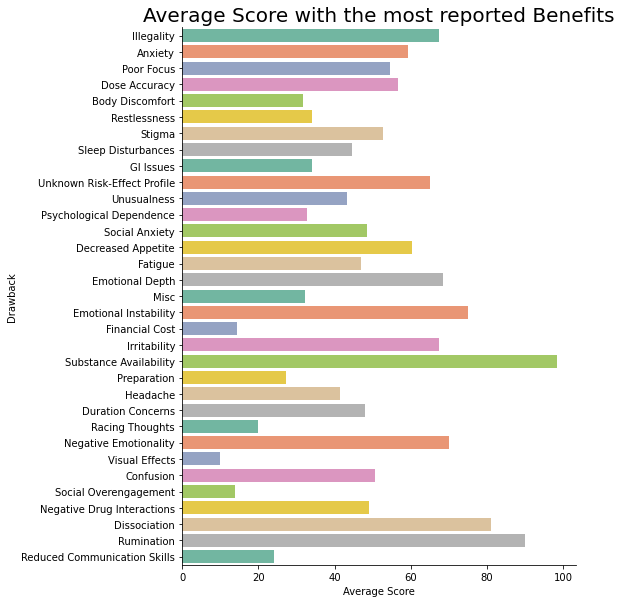

In [195]:
plt.figure(figsize=(10,10))
g = sns.catplot(data=drawbacks, kind="bar", y="Drawback", x="Average Score",
                palette="Set2", height=8)
plt.title('Average Score with the most reported Benefits',fontsize=20)

In [273]:
cons = data['ConCode1'].values
cons = cons[~pd.isnull(cons)]
cons = cons.tolist()
str1 = ''.join(cons)
#listToString(x)

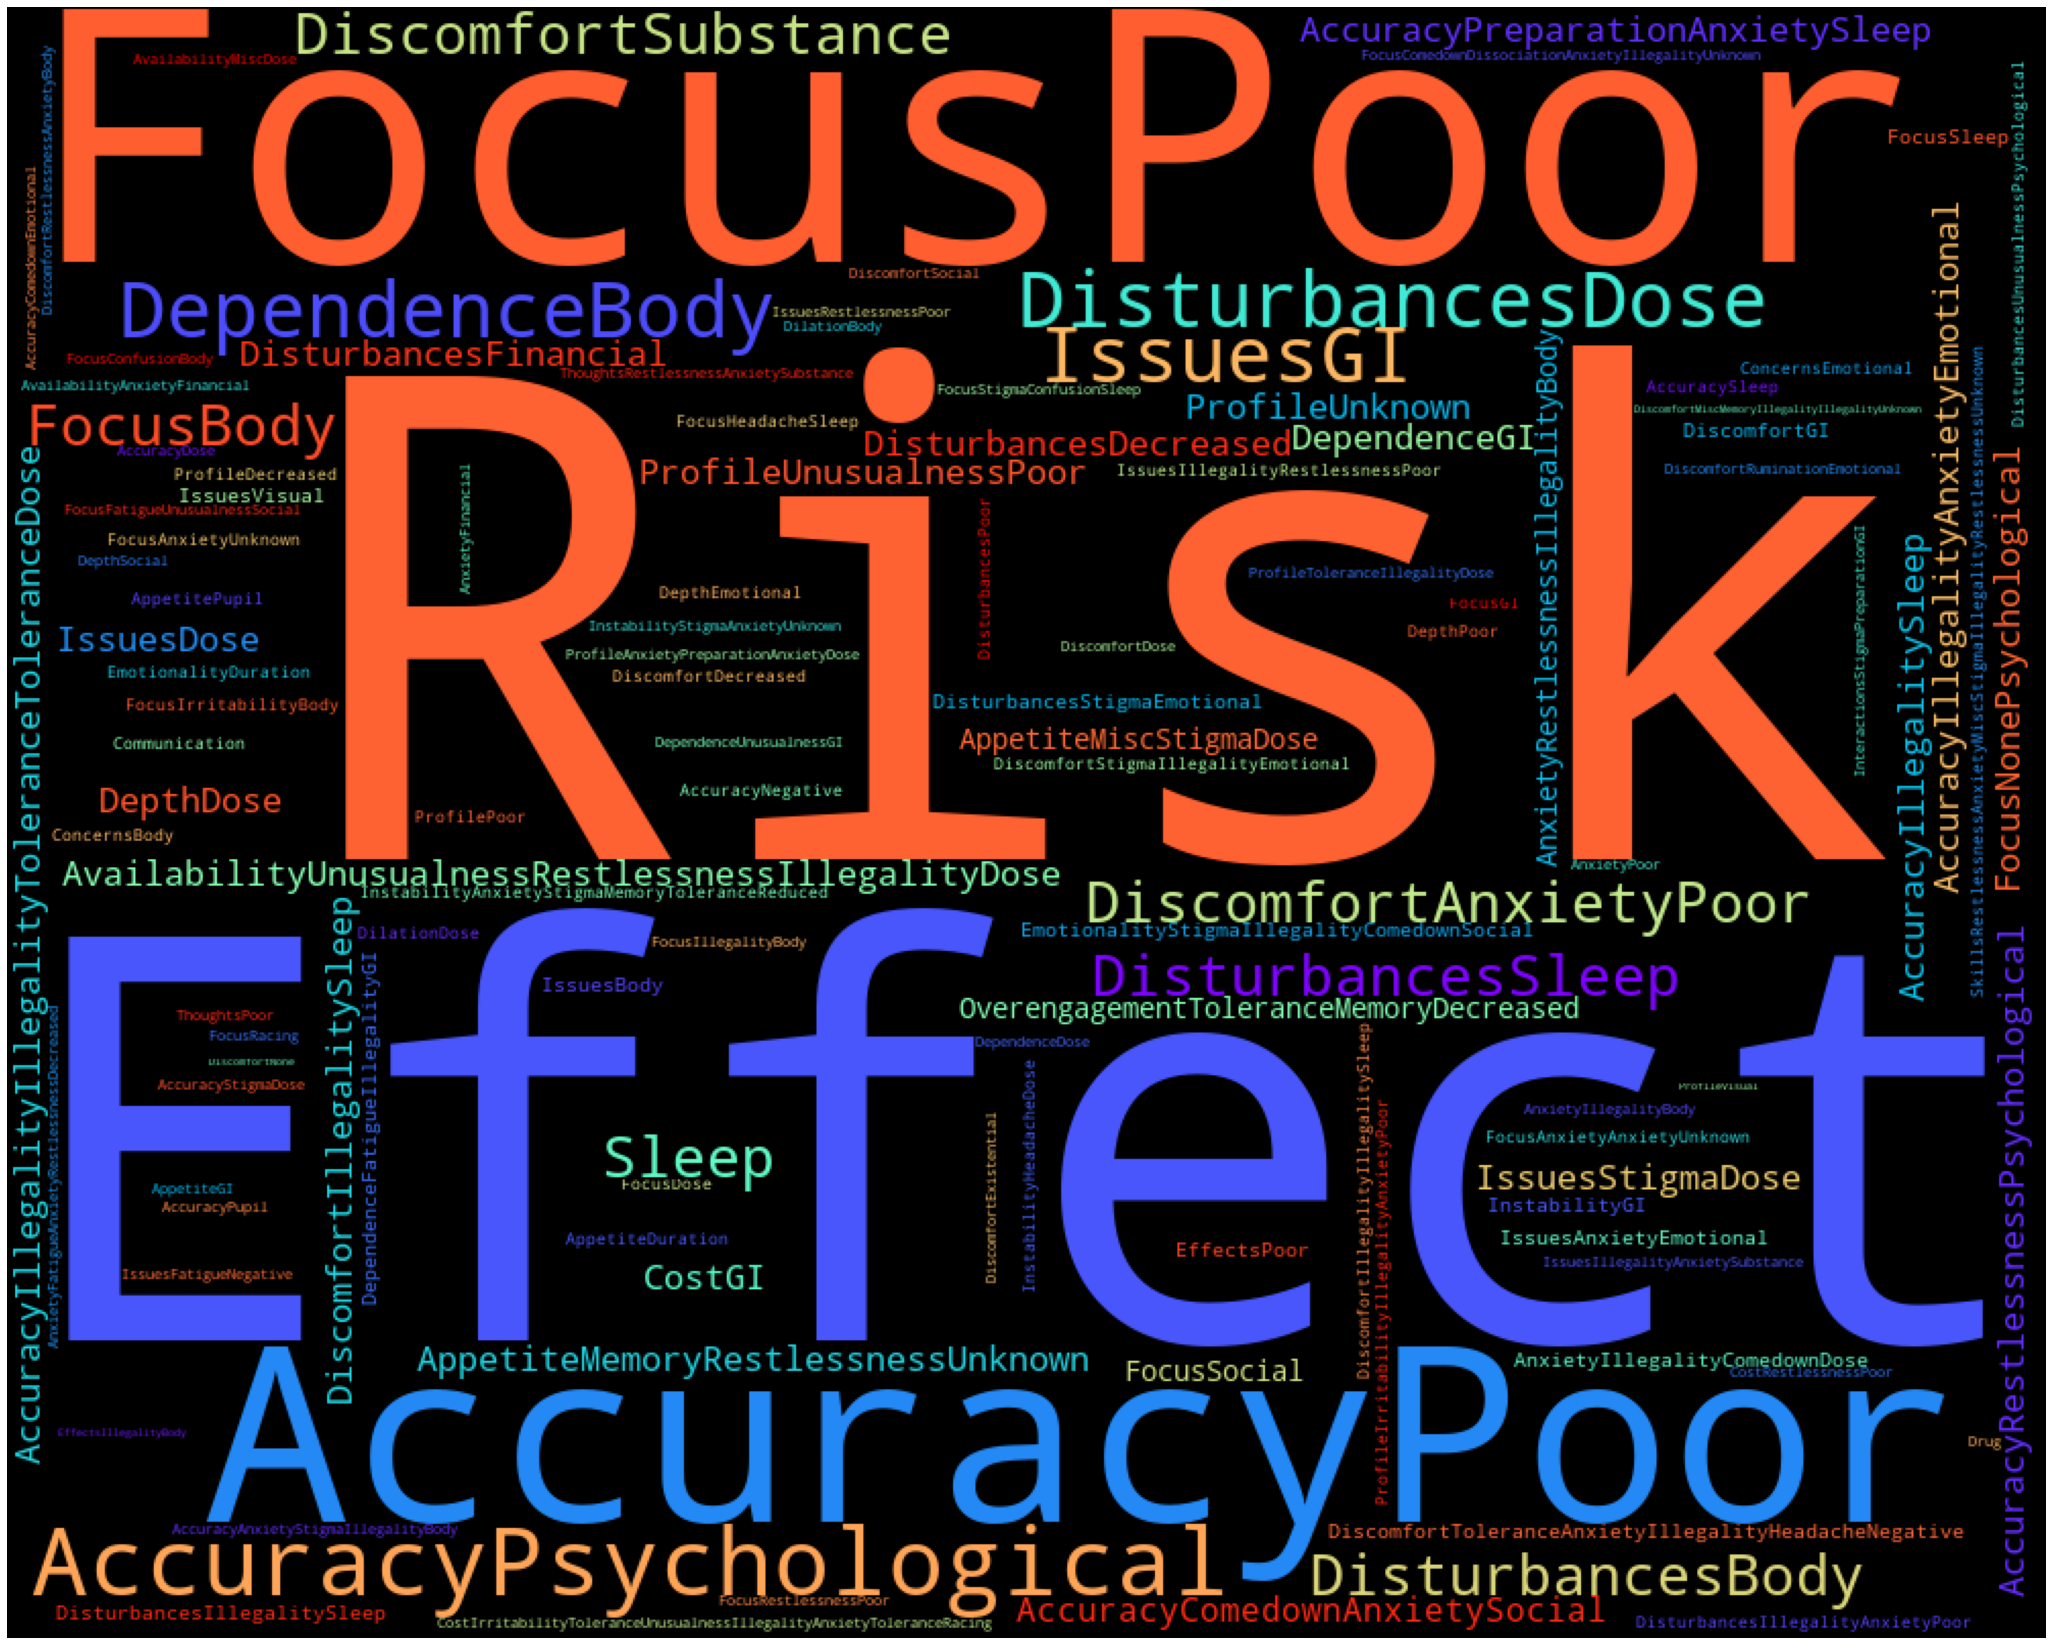

In [279]:
wordcloud = WordCloud(width = 1000, height = 800,
                      background_color='black', colormap='rainbow',
                      collocations=False, stopwords = STOPWORDS).generate(str1)
plot_cloud(wordcloud)

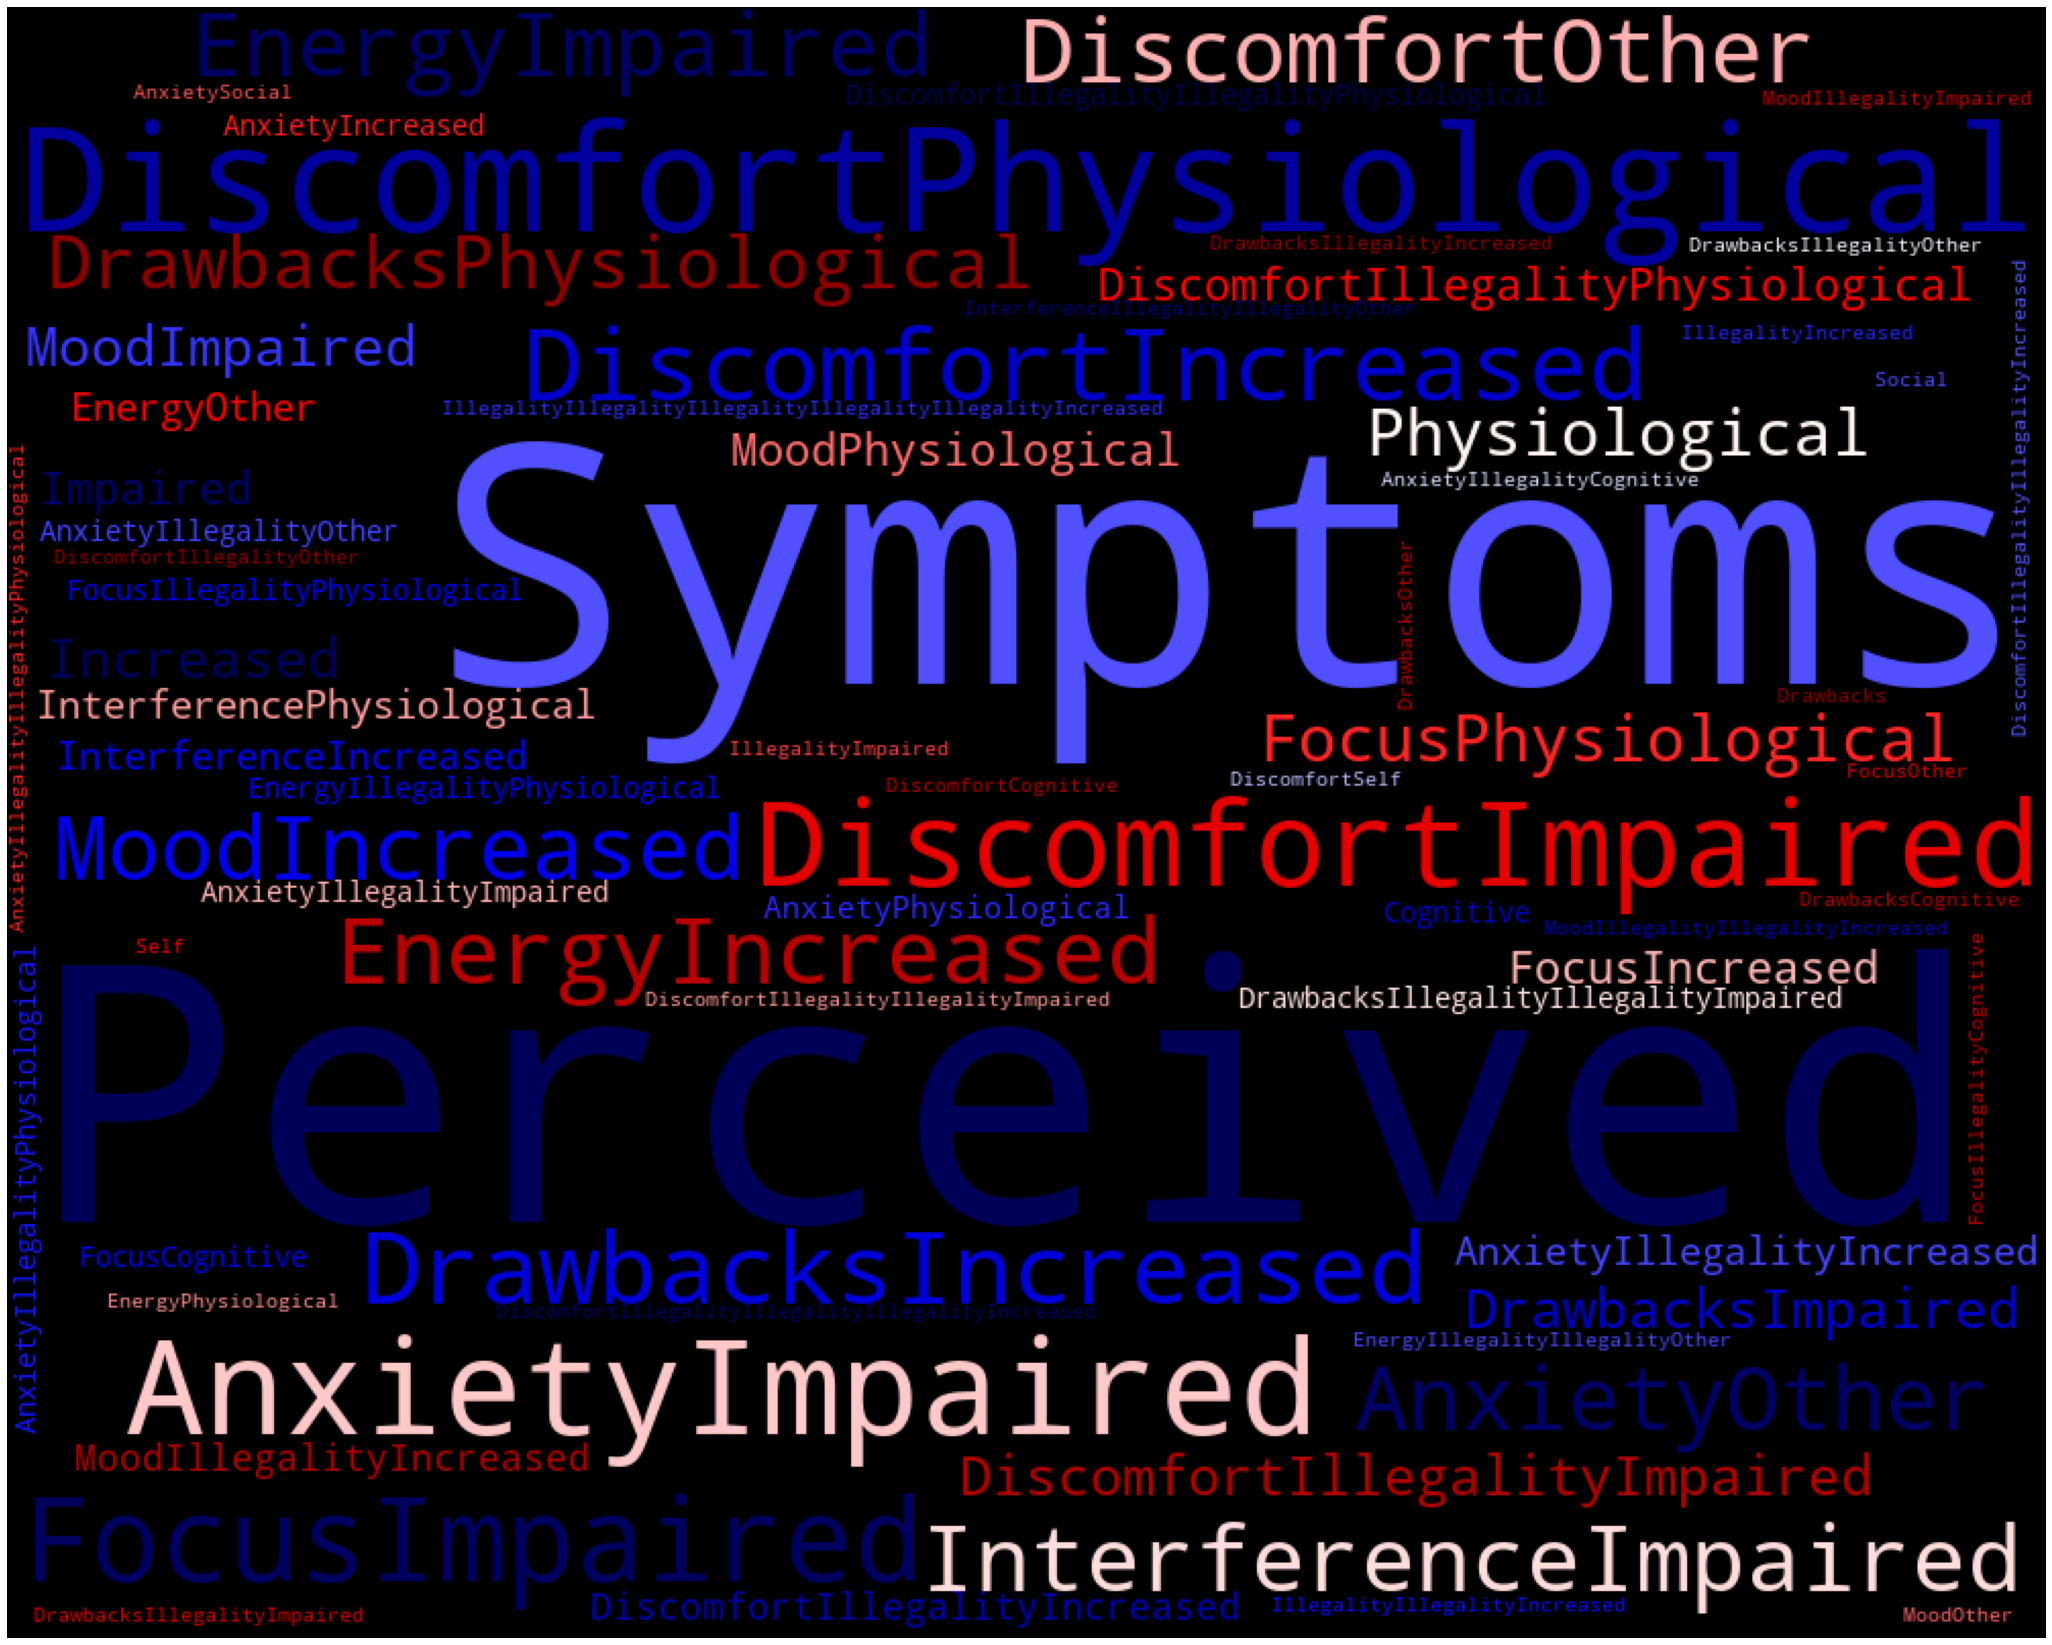

In [299]:
cons = data['ConCategory1'].values
cons = cons[~pd.isnull(cons)]
cons = cons.tolist()
str1 = ''.join(cons)
#listToString(x)

wordcloud = WordCloud(width = 1000, height = 800,
                      background_color='black', colormap='seismic',
                      collocations=False, stopwords = STOPWORDS).generate(str1)
plot_cloud(wordcloud)

**As a result of microdosing have you noticed any improvements in your experiences of the following?**

In [304]:
data.head(2)

ResponseId         StartDate           EndDate      RecordedDate  \
0  R_0HSeYpblz5LCLpD  19/09/2017 18:27  19/09/2017 18:51  19/09/2017 18:51   
1  R_0MpphsGkrwSMhuF  10/10/2017 21:06  10/10/2017 21:10  24/10/2017 21:10   

   Angry  Distressed  Afraid  Frustrated  Nervous  Alarmed  Tense  Annoyed  \
0      0           1       1           1        1        1      1        1   
1      0           0       0           1        0        0      0        0   

   Astonished  Excited  Alert  Delighted  Amused  Glad  Happy  Pleased  Sad  \
0           0        0      1          0       1     0      0        0    1   
1           0        0      0          0       0     0      0        0    1   

   Miserable  Depressed  Droopy  Gloomy  Fatigued  Bored  Tired  Serene  \
0          1          0       1       1         0      0      1       0   
1          0          0       0       0         1      1      1       0   

   Content  Calm  At ease  Satisfied  Relaxed  Sleepy  Quiet  Current  Reddit  \
0        0     0        0          0        0       1      0        1       5   
1        1     1        0          0        1       0      1        1       1   

   Country  Age  Gender  Orientation  Ethnicity Ethnicity_11_TEXT  Religion  \
0      187   21    -1.0         -1.0          1               -99         1   
1      187   29    -1.0         -1.0          6               -99         1   

  Religion_12_TEXT  Religiosity  Spirituality  Education  SES  AgeMD  \
0              -99            2            20        6.0  1.0     20   
1              -99           14            19        7.0  2.0     28   

   Substance_1  Substance_2  Substance_8  Dose_1  Dose_4  Dose_2  Dose_3  \
0            1          -99          -99     -99       1     -99     -99   
1            1            1          -99     -99       1     -99     -99   

   Dose_7  Dose_8  Spacing  DoseNumber  Money Money_1_TEXT Money_2_TEXT  \
0     -99     -99        3        25.0      1            5          -99   
1     -99     -99        1        26.0      1           20          -99   

  Money_3_TEXT Money_5_TEXT Money_6_TEXT  Friends  Recommend  Pro_1  \
0          -99          -99          -99        0          2     85   
1          -99          -99          -99        5          2     70   

        Pro_1_TEXT  Pro_2                 Pro_2_TEXT  Pro_3      Pro_3_TEXT  \
0  Self-Reflection   90.0  Changing internal beliefs   55.0  Habit-Training   
1       creativity   52.0                 motivation   45.0            mood   

   Con_1            Con_1_TEXT  Con_2 Con_2_TEXT  Con_3       Con_3_TEXT  \
0   25.0  Worse night of sleep    4.0    Illegal   20.0  I'm on a "drug"   
1   35.0            less sleep    NaN        -99    NaN              -99   

   ImpSleep  ImpEating  ImpExercise  ImpMeditative  ImpMood  ImpAnxiety  \
0       0.0        0.0          1.0            1.0      1.0         1.0   
1       0.0        0.0          0.0            0.0      1.0         1.0   

   RedAlcohol  RedTobacco  RedCaffeine  RedCannabis  RedOther_illicit  \
0         0.0         0.0          1.0          0.0               1.0   
1         1.0         0.0          0.0          0.0               1.0   

   RedPsychiatric  OverallHealth  DrugRecreational_1  DrugRecreational_2  \
0             0.0           83.0                 2.0                 4.0   
1             1.0           48.0                 1.0                 1.0   

   DrugRecreational_3  DrugRecreational_4  DrugRecreational_5  \
0                 2.0                 1.0                 1.0   
1                 3.0                 3.0               -99.0   

   DrugRecreational_6  DrugRecreational_7  DrugRecreational_8  \
0                 4.0                 4.0                 3.0   
1                 3.0                 3.0                 3.0   

   DrugRecreational_9  DrugRecreational_10  DrugRecreational_11  \
0                 4.0                  4.0                  1.0   
1                 3.0                  3

In [309]:
print(f"Mood: {sum(data['ImpMood']==1)}")
print(f"Anxiety: {sum(data['ImpAnxiety']==1)}")
print(f"Meditative practice: {sum(data['ImpMeditative']==1)}")
print(f"Eating habits: {sum(data['ImpEating']==1)}")
print(f"Sleep: {sum(data['ImpSleep']==1)}")
print(f"Exercise: {sum(data['ImpExercise']==1)}")

Mood: 248
Anxiety: 158
Meditative practice: 131
Eating habits: 96
Sleep: 77
Exercise: 131


**As a result of microdosing have you reduced your use of any of the following substances?**

In [311]:
print(f"Psychiatric prescription drugs use: {sum(data['RedPsychiatric']==1)}")
print(f"Alcohol use: {sum(data['RedAlcohol']==1)}")
print(f"Caffeine use: {sum(data['RedCaffeine']==1)}")
print(f"Cannabis use: {sum(data['RedCannabis']==1)}")
print(f"Tobacco use: {sum(data['RedTobacco']==1)}")
print(f"Other illicit drug use: {sum(data['RedOther_illicit']==1)}")

Psychiatric prescription drugs use: 45
Alcohol use: 113
Caffeine use: 118
Cannabis use: 81
Tobacco use: 56
Other illicit drug use: 43
